In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets.mnist import load_data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# ((x_train, y_train), (x_test, y_test))
((x_train, y_train), (x_test, y_test)) = load_data()

In [3]:
print("訓練資料維度:", x_train.shape)
print("測試資料維度:", x_test.shape)

訓練資料維度: (60000, 28, 28)
測試資料維度: (10000, 28, 28)


什麼數字: 7


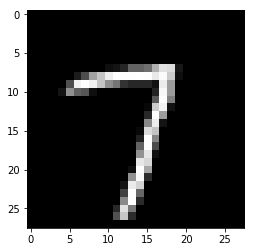

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print("什麼數字:", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [8]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,219,23,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,28,76,160,196,...,203,14,0,0,0,0,0,0,0,0
9,0,0,0,0,0,79,243,254,240,195,...,156,0,0,0,0,0,0,0,0,0


In [9]:
# 資料預處理
# 1. 圖片 = 0~1
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255
# 2. 目標: One-hot
from keras.utils import np_utils
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
# see see
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
# create model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# 只有第一層要給大小
# 784 * 127 + 128(bias)
model.add(Dense(input_dim=784, units=128, activation="relu"))
# 128 * 10 + 10(bias)
model.add(Dense(units=10, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 二元: binary_crossentropy
# 多元: categorical_crossentropy
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [22]:
# batch: 看幾筆作一次梯度下降(100 - 200)
# epoch: 課文要抄幾遍
# ?次更新: 60000 * 10 / 200
train_history = model.fit(x_train_shape, y_train_cat,
                         validation_split=0.1,
                         batch_size=200, 
                         epochs=10,
                         verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 1s - loss: 0.4328 - acc: 0.8821 - val_loss: 0.1902 - val_acc: 0.9502
Epoch 2/10
 - 1s - loss: 0.2014 - acc: 0.9434 - val_loss: 0.1446 - val_acc: 0.9612
Epoch 3/10
 - 1s - loss: 0.1483 - acc: 0.9583 - val_loss: 0.1134 - val_acc: 0.9695
Epoch 4/10
 - 1s - loss: 0.1183 - acc: 0.9661 - val_loss: 0.1055 - val_acc: 0.9702
Epoch 5/10
 - 1s - loss: 0.0967 - acc: 0.9729 - val_loss: 0.0932 - val_acc: 0.9718
Epoch 6/10
 - 1s - loss: 0.0816 - acc: 0.9769 - val_loss: 0.0866 - val_acc: 0.9740
Epoch 7/10
 - 1s - loss: 0.0701 - acc: 0.9800 - val_loss: 0.0781 - val_acc: 0.9767
Epoch 8/10
 - 1s - loss: 0.0608 - acc: 0.9829 - val_loss: 0.0765 - val_acc: 0.9773
Epoch 9/10
 - 1s - loss: 0.0526 - acc: 0.9851 - val_loss: 0.0765 - val_acc: 0.9770
Epoch 10/10
 - 1s - loss: 0.0464 - acc: 0.9870 - val_loss: 0.0779 - val_acc: 0.9760


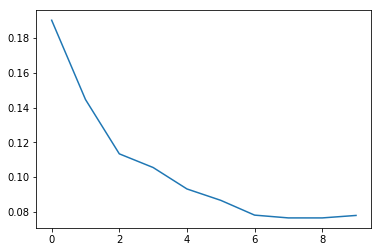

In [23]:
ys = train_history.history["val_loss"]
plt.plot(ys)

In [24]:
model.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 19us/step


[0.08130147932786494, 0.9747]